In [1]:
#!pip install category_encoders

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import matplotlib

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
#from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from google.colab import drive

from joblib import dump, load

drive.mount("/drive")

Mounted at /drive


In [3]:
df=pd.read_csv("/content/cars.csv",encoding="1251")
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,privat,Angebot,3000,control,kleinwagen,2008,manuell,...,ibiza,150000,7,benzin,seat,NaN,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,privat,Angebot,14990,control,suv,2006,automatik,...,NaN,150000,2,hybrid,sonstige_autos,nein,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,privat,Angebot,980,control,limousine,1992,manuell,...,NaN,150000,1,benzin,audi,NaN,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,privat,Angebot,12990,test,limousine,2010,manuell,...,civic,125000,3,benzin,honda,nein,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [5]:
df=df.rename(columns={"dateCrawled":"Получено","name":"Наименование","seller":"Продавец",
 'offerType':"Тип запроса",
 'price':"Цена",
 'abtest':"Тестирование",
 'vehicleType':"Тип кузова",
 'yearOfRegistration':"Год регистрации",
 'gearbox':"КПП",
 'powerPS':"Мощность",
 'model':"Модель",
 'kilometer':"Пробег",
 'monthOfRegistration':"Месяц регистрации",
 'fuelType':"Тип двигателя",
 'brand':"Марка",
 'notRepairedDamage':"Требуется ремонт",
 'dateCreated':"Дата создания",
 'nrOfPictures':"Фотографии",
 'postalCode':"Индекс",
 'lastSeen;;;;;;;;':"Последняя активность"})

In [6]:
df=df.replace({"Продавец":{'privat':"Часное лицо", 'gewerblich':"Организация"}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,kleinwagen,2008,manuell,...,ibiza,150000,7,benzin,seat,NaN,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,suv,2006,automatik,...,NaN,150000,2,hybrid,sonstige_autos,nein,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,limousine,1992,manuell,...,NaN,150000,1,benzin,audi,NaN,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,limousine,2010,manuell,...,civic,125000,3,benzin,honda,nein,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [7]:
df=df.replace({"КПП":{'manuell':"МКПП", 'automatik':"АКПП","":None,float('nan'):None}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,NaN,1993,МКПП,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,coupe,2011,МКПП,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,suv,2004,АКПП,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,kleinwagen,2001,МКПП,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,kleinwagen,2008,МКПП,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,kleinwagen,2008,МКПП,...,ibiza,150000,7,benzin,seat,NaN,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,suv,2006,АКПП,...,NaN,150000,2,hybrid,sonstige_autos,nein,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,limousine,1992,МКПП,...,NaN,150000,1,benzin,audi,NaN,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,limousine,2010,МКПП,...,civic,125000,3,benzin,honda,nein,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [8]:
df=df.replace({"Требуется ремонт":{'ja':"Да", 'nein':"Нет","":None,float('nan'):None}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,NaN,1993,МКПП,...,golf,150000,0,benzin,volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,coupe,2011,МКПП,...,NaN,125000,5,diesel,audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,suv,2004,АКПП,...,grand,125000,8,diesel,jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,kleinwagen,2001,МКПП,...,golf,150000,6,benzin,volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,kleinwagen,2008,МКПП,...,fabia,90000,7,diesel,skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,kleinwagen,2008,МКПП,...,ibiza,150000,7,benzin,seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,suv,2006,АКПП,...,NaN,150000,2,hybrid,sonstige_autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,limousine,1992,МКПП,...,NaN,150000,1,benzin,audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,limousine,2010,МКПП,...,civic,125000,3,benzin,honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [9]:
df=df.replace({"Тип двигателя":{'benzin':"Бензин", 'diesel':"Дизель","lpg":"Водород","andere":"Другое",'hybrid':"Гибрид","cng":"Газ","elektro":"Электро","":None,float('nan'):None}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,NaN,1993,МКПП,...,golf,150000,0,Бензин,volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,coupe,2011,МКПП,...,NaN,125000,5,Дизель,audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,suv,2004,АКПП,...,grand,125000,8,Дизель,jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,kleinwagen,2001,МКПП,...,golf,150000,6,Бензин,volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,kleinwagen,2008,МКПП,...,fabia,90000,7,Дизель,skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,kleinwagen,2008,МКПП,...,ibiza,150000,7,Бензин,seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,suv,2006,АКПП,...,NaN,150000,2,Гибрид,sonstige_autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,limousine,1992,МКПП,...,NaN,150000,1,Бензин,audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,limousine,2010,МКПП,...,civic,125000,3,Бензин,honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [10]:
df["Тип кузова"].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [11]:
df[df["Тип кузова"] == "bus"]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
8,8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,Часное лицо,Angebot,14500,control,bus,2014,МКПП,...,c_max,30000,8,Бензин,ford,None,2016-04-04 00:00:00,0.0,94505.0,2016-04-04 23:42:13
18,18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,Часное лицо,Angebot,7550,test,bus,2007,МКПП,...,c_max,150000,6,Дизель,ford,Нет,2016-03-23 00:00:00,0.0,88361.0,2016-04-05 18:45:11
19,19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,Часное лицо,Angebot,1850,test,bus,2004,МКПП,...,a_klasse,150000,1,Бензин,mercedes_benz,Нет,2016-04-01 00:00:00,0.0,49565.0,2016-04-05 22:46:05
28,28,2016-03-09 11:56:38,Volkswagen_T3_andere,Часное лицо,Angebot,1990,test,bus,1981,МКПП,...,transporter,5000,1,Бензин,volkswagen,Нет,2016-03-09 00:00:00,0.0,87471.0,2016-03-10 07:44:33
39,39,2016-03-25 15:50:30,Mercedes_Camper_D407,Часное лицо,Angebot,1500,test,bus,1984,МКПП,...,andere,150000,8,Дизель,mercedes_benz,Нет,2016-03-25 00:00:00,0.0,22767.0,2016-03-27 03:17:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,44091,2016-03-23 19:00:20,Opel_Zafira_1.8_16V_Elegance,Часное лицо,Angebot,1800,test,bus,1999,МКПП,...,zafira,150000,11,Бензин,opel,Нет,2016-03-23 00:00:00,0.0,24105.0,2016-04-05 23:46:00
44130,44130,2016-03-12 22:57:57,Opel_Meriva_1.4,Часное лицо,Angebot,5700,control,bus,2007,МКПП,...,meriva,80000,11,Бензин,opel,Нет,2016-03-12 00:00:00,0.0,86492.0,2016-04-06 13:45:47
44134,44134,2016-03-24 20:53:58,Fiat_Ducato_10_JTD_230.136.1_C1A,Часное лицо,Angebot,1800,test,bus,2001,МКПП,...,ducato,150000,12,Дизель,fiat,Нет,2016-03-24 00:00:00,0.0,45276.0,2016-04-05 14:46:21
44139,44139,2016-03-18 01:32:23,CitroГ«n_Jumpy,Часное лицо,Angebot,5000,control,bus,2007,МКПП,...,andere,150000,0,Дизель,citroen,None,2016-03-18 00:00:00,0.0,60488.0,2016-03-21 23:15:31


In [12]:
df=df.replace({"Тип кузова":{"coupe":"Купе","suv":"Кроссовер","kleinwagen":"Малолитражка","limousine":"Седан","cabrio":"Кабриолет","bus":"Минивен","kombi":"Универсал","andere":"Другой","":None,float('nan'):None}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,...,golf,150000,0,Бензин,volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,...,NaN,125000,5,Дизель,audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,...,grand,125000,8,Дизель,jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,...,golf,150000,6,Бензин,volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,...,fabia,90000,7,Дизель,skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,Малолитражка,2008,МКПП,...,ibiza,150000,7,Бензин,seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,Кроссовер,2006,АКПП,...,NaN,150000,2,Гибрид,sonstige_autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,Седан,1992,МКПП,...,NaN,150000,1,Бензин,audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,Седан,2010,МКПП,...,civic,125000,3,Бензин,honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [13]:
df["Тип кузова"].unique()

array([None, 'Купе', 'Кроссовер', 'Малолитражка', 'Седан', 'Кабриолет',
       'Минивен', 'Универсал', 'Другой'], dtype=object)

In [14]:
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,...,golf,150000,0,Бензин,volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,...,NaN,125000,5,Дизель,audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,...,grand,125000,8,Дизель,jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,...,golf,150000,6,Бензин,volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,...,fabia,90000,7,Дизель,skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,Малолитражка,2008,МКПП,...,ibiza,150000,7,Бензин,seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,Кроссовер,2006,АКПП,...,NaN,150000,2,Гибрид,sonstige_autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,Седан,1992,МКПП,...,NaN,150000,1,Бензин,audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,Седан,2010,МКПП,...,civic,125000,3,Бензин,honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [15]:
df["Марка"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada', nan], dtype=object)

In [16]:
df=df.replace({"Марка":{"":None,float('nan'):None,
                             'volkswagen':"Volkswagen", 'audi':'Audi', 'jeep':'Jeep', 'skoda':"Skoda", 'bmw':"BMW", 'peugeot':"Peugeot", 'ford':'Ford',
       'mazda':"Mazda", 'nissan':"Nissan", 'renault':"Renault", 'mercedes_benz':"Mercedes-Benz", 'opel':"Opel", 'seat':"Seat",
       'citroen':"Citroen", 'honda':"Honda", 'fiat':"Fiat", 'mini':"Mini", 'smart':"Smart", 'hyundai':"Hyundai",
       'sonstige_autos':"Sonstige Autos", 'alfa_romeo':"Alfa Romeo", 'subaru':"Subaru", 'volvo':"Volvo", 'mitsubishi':"Mitsubishi",
       'kia':"Kia", 'suzuki':"Suzuki", 'lancia':"Lancia", 'porsche':'Porsche', 'toyota':"Toyota", 'chevrolet':"Chevrolet",
       'dacia':"Dacia", 'daihatsu':"Daihatsu", 'trabant':"Trabant", 'saab':"Saab", 'chrysler':"Chrysler", 'jaguar':"Jaguar",
       'daewoo':"Daewoo", 'rover':"Land Rover", 'land_rover':"Land Rover", 'lada':"Lada"}})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,...,golf,150000,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,...,NaN,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,...,grand,125000,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,...,golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,...,fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,Малолитражка,2008,МКПП,...,ibiza,150000,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,Кроссовер,2006,АКПП,...,NaN,150000,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,Седан,1992,МКПП,...,NaN,150000,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,Седан,2010,МКПП,...,civic,125000,3,Бензин,Honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


Вывод категорий марки и модели

In [17]:
df["Марка"].unique()

array(['Volkswagen', 'Audi', 'Jeep', 'Skoda', 'BMW', 'Peugeot', 'Ford',
       'Mazda', 'Nissan', 'Renault', 'Mercedes-Benz', 'Opel', 'Seat',
       'Citroen', 'Honda', 'Fiat', 'Mini', 'Smart', 'Hyundai',
       'Sonstige Autos', 'Alfa Romeo', 'Subaru', 'Volvo', 'Mitsubishi',
       'Kia', 'Suzuki', 'Lancia', 'Porsche', 'Toyota', 'Chevrolet',
       'Dacia', 'Daihatsu', 'Trabant', 'Saab', 'Chrysler', 'Jaguar',
       'Daewoo', 'Land Rover', 'Lada', None], dtype=object)

In [18]:
df["Модель"].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

Удаление дубликатов и сортировка по марке модели

In [19]:
df[["Марка","Модель"]].drop_duplicates().sort_values("Марка")

,Марка,Модель
427,Alfa Romeo,NaN
1084,Alfa Romeo,andere
142,Alfa Romeo,147
82,Alfa Romeo,156
437,Alfa Romeo,spider
...,...,...
5863,Volvo,850
10524,Volvo,v60
4401,Volvo,s60
1307,Volvo,andere


In [20]:
df=df.replace({"Модель":{"":None,float('nan'):None,
                        'golf':'Golf',
                        'grand':'Grand Cherokee',
                        'fabia':'Fabia',
                        '3er':'3er',
                        '2_reihe':'2 серия',
                        'andere':'Другое',
                        'c_max':'C-Max',
                        '3_reihe':'3 серия',
                        'passat':'Passat',
                        'navara':'Navara',
                        'ka':'Ka',
                        'polo':'Polo',
                        'twingo':'Twingo',
                        'a_klasse':'A класс',
                        'scirocco':'Scirocco',
                        '5er':'5er',
                        'meriva':'Meriva',
                        'arosa':'Arosa',
                        'c4':'C4',
                        'civic':'Civic',
                        'transporter':'Transporter',
                        'punto':'Punto',
                        'e_klasse':'E класс',
                        'clio':'Clio',
                        'kadett':'Kadett',
                        'kangoo':'Kangoo',
                        'corsa':'Corsa',
                        'one':'One',
                        'fortwo':'Fortwo',
                        '1er':'1er',
                        'b_klasse':'B класс',
                        'signum':'Signum',
                        'astra':'Astra',
                        'a8':'A8',
                        'jetta':'Jetta',
                        'fiesta':'Fiesta',
                        'c_klasse':'C класс',
                        'micra':'Micra',
                        'vito':'Vito',
                        'sprinter':'Sprinter',
                        '156':'156',
                        'escort':'Escort',
                        'forester':'Forester',
                        'xc_reihe':'XC серия',
                        'scenic':'Scenic',
                        'a4':'A4',
                        'a1':'A1',
                        'insignia':'Insignia',
                        'combo':'Combo',
                        'focus':'Focus',
                        'tt':'TT',
                        'a6':'A6',
                        'jazz':'Jazz',
                        'omega':'Omega',
                        'slk':'Slk',
                        '7er':'7er',
                        '80':'80',
                        '147':'147',
                        'glk':'GLK',
                        '100':'100',
                        'z_reihe':'Z серия',
                        'sportage':'Sportage',
                        'sorento':'Sorento',
                        'v40':'V40',
                        'ibiza':'Ibiza',
                        'mustang':'Mustang',
                        'eos':'Eos',
                        'touran':'Touran',
                        'getz':'Getz',
                        'a3':'A3',
                        'almera':'Almera',
                        'megane':'Megane',
                        'lupo':'Lupo',
                        'r19':'r19',
                        'zafira':'Zafira',
                        'caddy':'Caddy',
                        'mondeo':'Mondeo',
                        'cordoba':'Cordoba',
                        'colt':'Colt',
                        'impreza':'Impreza',
                        'vectra':'Vectra',
                        'berlingo':'Berlingo',
                        'm_klasse':'M класс',
                        'tiguan':'Tiguan',
                        'i_reihe':'I серия',
                        'espace':'Espace',
                        'sharan':'Sharan',
                        '6_reihe':'6 серия',
                        'panda':'Panda',
                        'up':'Up!',
                        'seicento':'Seicento',
                        'ceed':'Ceed',
                        '5_reihe':'5 Серия',
                        'yeti':'Yeti',
                        'octavia':'Octavia',
                        'mii':'Mii',
                        'rx_reihe':'RX серия',
                        '6er':'6er',
                        'modus':'Modus',
                        'fox':'Fox',
                        'matiz':'Matiz',
                        'beetle':'Beetle',
                        'c1':'C1',
                        'rio':'Rio',
                        'touareg':'Touareg',
                        'logan':'Logan',
                        'spider':'Spider',
                        'cuore':'Cuore',
                        's_max':'S-Max',
                        'a2':'A2',
                        'x_reihe':'X серия',
                        'a5':'A5',
                        'galaxy':'Galaxy',
                        'c3':'C3',
                        'viano':'Viano',
                        's_klasse':'S класс',
                        '1_reihe':'1 серия',
                        'avensis':'Avensis',
                        'sl':'SL',
                        'roomster':'Roomster',
                        'q5':'Q5',
                        'kaefer':'Kaefer',
                        'santa':'Santa',
                        'cooper':'Cooper',
                        'leon':'Leon',
                        '4_reihe':'4 серия',
                        '500':'500',
                        'laguna':'Laguna',
                        'ptcruiser':'Ptcruiser',
                        'clk':'CLK',
                        'primera':'Primera',
                        'exeo':'Exeo',
                        '159':'159',
                        'transit':'Transit',
                        'juke':'Juke',
                        'qashqai':'Qashqai',
                        'carisma':'Carisma',
                        'accord':'Accord',
                        'corolla':'Corolla',
                        'lanos':'Lanos',
                        'phaeton':'Phaeton',
                        'boxster':'Boxster',
                        'verso':'Verso',
                        'swift':'Swift',
                        'rav':'RAV4',
                        'kuga':'Kuga',
                        'picanto':'Picanto',
                        'kalos':'Kalos',
                        'superb':'Superb',
                        'stilo':'Stilo',
                        'alhambra':'Alhambra',
                        '911':'911',
                        'mx_reihe':'MX серия',
                        'm_reihe':'M серия',
                        'roadster':'Roadster',
                        'ypsilon':'Ypsilon',
                        'cayenne':'Cayenne',
                        'galant':'Galant',
                        'justy':'Justy',
                        '90':'90',
                        'sirion':'Sirion',
                        'crossfire':'Crossfire',
                        'agila':'Agila',
                        'duster':'Duster',
                        'cr_reihe':'CR серия',
                        'v50':'V50',
                        'discovery':'Discovery',
                        'c_reihe':'C серия',
                        'v_klasse':'V класс',
                        'yaris':'Yaris',
                        'c5':'C5',
                        'aygo':'Aygo',
                        'cc':'CC',
                        'carnival':'Carnival',
                        'fusion':'Fusion',
                        'bora':'Bora',
                        'forfour':'Forfour',
                        'cl':'CL',
                        'tigra':'Tigra',
                        '300c':'300C',
                        'q3':'Q3',
                        'spark':'Spark',
                        'v70':'v70',
                        'x_type':'X-Type',
                        'ducato':'Sucato',
                        's_type':'S-Type',
                        'x_trail':'X-Trail',
                        'toledo':'Toledo',
                        'altea':'Altea',
                        'voyager':'Voyager',
                        'calibra':'Calibra',
                        'bravo':'Bravo',
                        'range_rover':'Range Rover',
                        'antara':'Antara',
                        'tucson':'Tucson',
                        'q7':'Q7',
                        'citigo':'Citigo',
                        'jimny':'Jimny',
                        'cx_reihe':'CX серия',
                        'wrangler':'Wrangler',
                        'lybra':'Lybra',
                        'range_rover_sport':'Range Rover Sport',
                        'lancer':'Lancer',
                        'freelander':'Freelander',
                        'captiva':'Captiva',
                        'c2':'C2',
                        'range_rover_evoque':'Range Rover Evoque',
                        'sandero':'Sandero',
                        'note':'Note',
                        '900':'900',
                        'defender':'Defender',
                        'cherokee':'Cherokee',
                        'clubman':'Clubman',
                        'samara':'Samara',
                        '601':'601',
                        'legacy':'Legacy',
                        'pajero':'Pajero',
                        'auris':'Auris',
                        'niva':'Niva',
                        's60':'S60',
                        'nubira':'Nubira',
                        'vivaro':'Vivaro',
                        'g_klasse':'G класс',
                        'lodgy':'Lodgy',
                        '850':'850',
                        'serie_2':'Series II',
                        'charade':'Charade',
                        'croma':'Croma',
                        'outlander':'Outlander',
                        'gl':'GL',
                        '':None,
                        'doblo':'Doblo',
                        'musa':'Musa',
                        'amarok':'Amarok',
                        'move':'Move',
                        '9000':'9000',
                        'v60':'V60',
                        '145':'145',
                        'aveo':'Aveo',
                        '200':'200',
                        'b_max':'B-Max',
                        'delta':'Delta',
                        'terios':'Terios',
                        'rangerover':'Range Rover',
                        'materia':'Materia',
                        'kalina':'Kalina',
                        'elefantino':'Elefantino',
                        'i3':'i3',
                        'kappa':'Kappa',
                        'serie_3':'Series III',
                        'serie_1':'Series I',
                        'discovery_sport':'Discovery Sport',
                        }})
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,...,Golf,150000,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,...,None,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,...,Grand Cherokee,125000,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,...,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,...,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,Малолитражка,2008,МКПП,...,Ibiza,150000,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,Кроссовер,2006,АКПП,...,None,150000,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,Седан,1992,МКПП,...,None,150000,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,Седан,2010,МКПП,...,Civic,125000,3,Бензин,Honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


In [21]:
df[["Марка","Модель"]].drop_duplicates().sort_values("Марка")

,Марка,Модель
437,Alfa Romeo,Spider
82,Alfa Romeo,156
762,Alfa Romeo,159
1084,Alfa Romeo,Другое
142,Alfa Romeo,147
...,...,...
5863,Volvo,850
171,Volvo,V40
1772,Volvo,v70
10524,Volvo,V60


In [ ]:
df["Фотографии"].unique()

array([0])

In [ ]:
df=df.drop(columns=["Фотографии"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,0,Golf,150000,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,190,None,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,8,Дизель,Jeep,None,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,75,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,69,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200,test,None,2005,None,0,None,20000,1,None,Sonstige Autos,None,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199,test,Кабриолет,2000,АКПП,101,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200,test,Минивен,1996,МКПП,102,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400,test,Универсал,2002,МКПП,100,Golf,150000,6,Дизель,Volkswagen,None,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


2.	Сделаем  описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [ ]:
df.describe()

,index,Цена,Год регистрации,Мощность,Пробег,Месяц регистрации,Индекс
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


3.	Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [22]:
df["Цена"]=df["Цена"].fillna(0).astype(int)
df["Год регистрации"]=df["Год регистрации"].fillna(0).astype(int)
df["Мощность"]=df["Мощность"].fillna(0).astype(int)
df["Пробег"]=df["Пробег"].fillna(0).astype(int)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480,test,None,1993,МКПП,...,Golf,150000,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300,test,Купе,2011,МКПП,...,None,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800,test,Кроссовер,2004,АКПП,...,Grand Cherokee,125000,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500,test,Малолитражка,2001,МКПП,...,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600,test,Малолитражка,2008,МКПП,...,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000,control,Малолитражка,2008,МКПП,...,Ibiza,150000,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990,control,Кроссовер,2006,АКПП,...,None,150000,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980,control,Седан,1992,МКПП,...,None,150000,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990,test,Седан,2010,МКПП,...,Civic,125000,3,Бензин,Honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


Заменим пустые значения ячеек на None

In [24]:
df.loc[(df["Цена"] == 0)|(df["Цена"] == np.nan),"Цена"]=None
df.loc[(df["Год регистрации"] == 0)|(df["Год регистрации"] == np.nan),"Год регистрации"]=None
df.loc[(df["Мощность"] == 0)|(df["Мощность"] == np.nan),"Мощность"]=None
df.loc[(df["Пробег"] == 0)|(df["Пробег"] == np.nan),"Пробег"]=None
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993.0,МКПП,...,Golf,150000.0,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011.0,МКПП,...,None,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004.0,АКПП,...,Grand Cherokee,125000.0,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001.0,МКПП,...,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008.0,МКПП,...,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000.0,control,Малолитражка,2008.0,МКПП,...,Ibiza,150000.0,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990.0,control,Кроссовер,2006.0,АКПП,...,None,150000.0,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980.0,control,Седан,1992.0,МКПП,...,None,150000.0,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35
44194,44194,2016-03-16 23:52:21,Honda_Civic_2.0_i_VTEC_Type_R_Championship_Whi...,Часное лицо,Angebot,12990.0,test,Седан,2010.0,МКПП,...,Civic,125000.0,3,Бензин,Honda,Нет,2016-03-16 00:00:00,0.0,99085.0,2016-04-06 00:45:33


4.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения (категориальные значения заменить на моду, числовые на среднее). Постарайтесь данное преобразование выполнить в одном цикле.

In [ ]:
#смотрим на столбцы без марки - они бесполезные
df[df["Марка"].isnull()]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen


In [25]:
#Удалим их
df=df.drop(df[df["Марка"].isnull()].index)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993.0,МКПП,...,Golf,150000.0,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011.0,МКПП,...,None,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004.0,АКПП,...,Grand Cherokee,125000.0,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001.0,МКПП,...,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008.0,МКПП,...,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44190,44190,2016-04-01 00:39:11,Cadillac__STS_4.6_LPG__Frontschaden,Часное лицо,Angebot,3750.0,test,Седан,2010.0,АКПП,...,None,125000.0,10,Водород,Sonstige Autos,None,2016-03-31 00:00:00,0.0,59199.0,2016-04-07 02:44:24
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000.0,control,Малолитражка,2008.0,МКПП,...,Ibiza,150000.0,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990.0,control,Кроссовер,2006.0,АКПП,...,None,150000.0,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980.0,control,Седан,1992.0,МКПП,...,None,150000.0,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35


In [26]:
#У данной марки нет модели
df[df["Марка"]=="Sonstige Autos"]["Модель"].unique()

array([None], dtype=object)

In [27]:
#Выставим модель как другую
df.loc[(df["Марка"]=="Sonstige Autos"),"Модель"]="Другое"

In [28]:
#Там, где пропущена модель, заменим её на наиболее частую для марки
mode_models=df[df["Модель"].notnull()].groupby(['Марка']).agg(pd.Series.mode)["Модель"]
def mode_models_fill(stroka):
  return mode_models[stroka["Марка"]]
df.loc[df["Модель"].isnull(),"Модель"]=df[df["Модель"].isnull()].apply(mode_models_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993.0,МКПП,...,Golf,150000.0,0,Бензин,Volkswagen,None,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011.0,МКПП,...,A4,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004.0,АКПП,...,Grand Cherokee,125000.0,8,Дизель,Jeep,None,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001.0,МКПП,...,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008.0,МКПП,...,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44190,44190,2016-04-01 00:39:11,Cadillac__STS_4.6_LPG__Frontschaden,Часное лицо,Angebot,3750.0,test,Седан,2010.0,АКПП,...,Другое,125000.0,10,Водород,Sonstige Autos,None,2016-03-31 00:00:00,0.0,59199.0,2016-04-07 02:44:24
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000.0,control,Малолитражка,2008.0,МКПП,...,Ibiza,150000.0,7,Бензин,Seat,None,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990.0,control,Кроссовер,2006.0,АКПП,...,Другое,150000.0,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980.0,control,Седан,1992.0,МКПП,...,A4,150000.0,1,Бензин,Audi,None,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35


In [29]:
#Ремонт заменяем на моду
df['Требуется ремонт'].fillna(df['Требуется ремонт'].mode()[0], inplace=True)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993.0,МКПП,...,Golf,150000.0,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011.0,МКПП,...,A4,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004.0,АКПП,...,Grand Cherokee,125000.0,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001.0,МКПП,...,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008.0,МКПП,...,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44190,44190,2016-04-01 00:39:11,Cadillac__STS_4.6_LPG__Frontschaden,Часное лицо,Angebot,3750.0,test,Седан,2010.0,АКПП,...,Другое,125000.0,10,Водород,Sonstige Autos,Нет,2016-03-31 00:00:00,0.0,59199.0,2016-04-07 02:44:24
44191,44191,2016-03-14 09:37:52,Seat_Ibiza_Formula_Racing_2008,Часное лицо,Angebot,3000.0,control,Малолитражка,2008.0,МКПП,...,Ibiza,150000.0,7,Бензин,Seat,Нет,2016-03-14 00:00:00,0.0,77933.0,2016-03-23 09:17:57
44192,44192,2016-03-21 12:25:25,Lexus_RX_400h_Executive_inkl._Lexus_Garantie,Часное лицо,Angebot,14990.0,control,Кроссовер,2006.0,АКПП,...,Другое,150000.0,2,Гибрид,Sonstige Autos,Нет,2016-03-21 00:00:00,0.0,61350.0,2016-04-06 16:16:40
44193,44193,2016-04-06 06:36:35,Audi_80_aus_1er_Hand_133000_km__D3_norm,Часное лицо,Angebot,980.0,control,Седан,1992.0,МКПП,...,A4,150000.0,1,Бензин,Audi,Нет,2016-04-06 00:00:00,0.0,33378.0,2016-04-06 06:36:35


Посмтрим гистограммы распределения  и боксплоты для отдельных столбцов

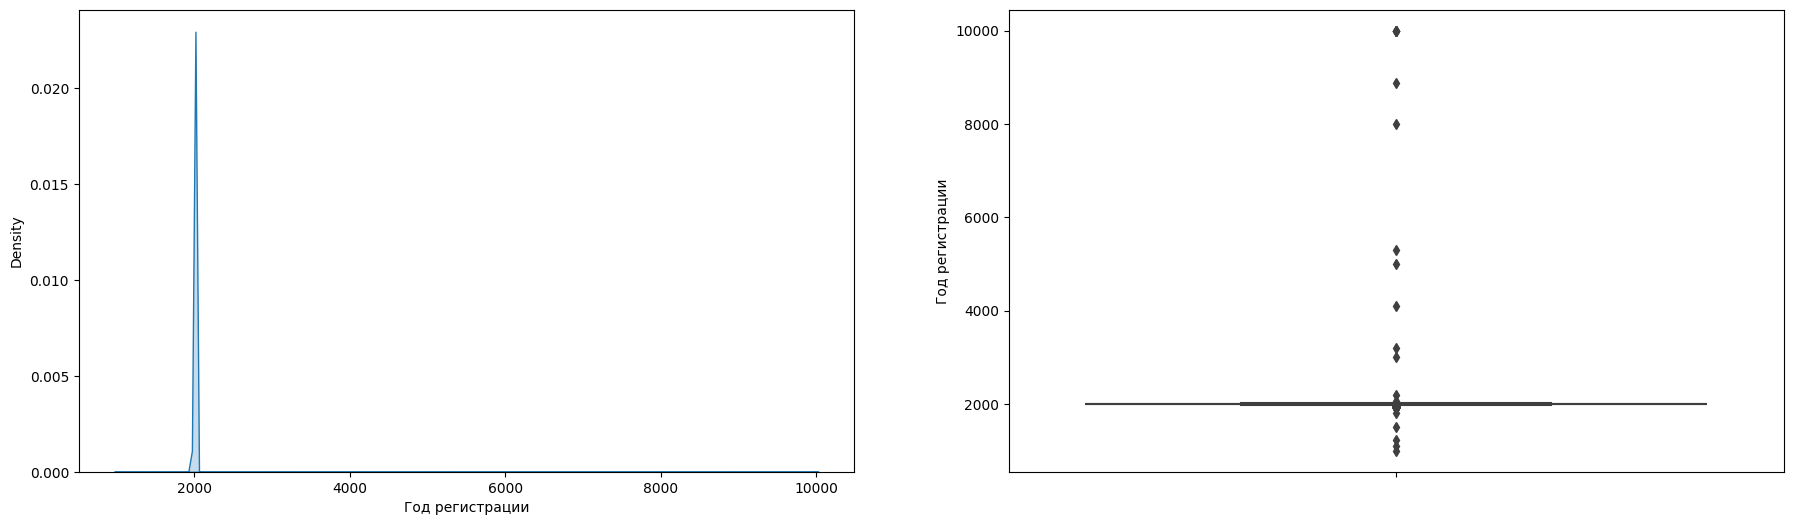

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Год регистрации"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Год регистрации"])

plt.show()

In [ ]:
#Будем считать ошибкой такие года
df.loc[(df["Год регистрации"]<1940)|(df["Год регистрации"]>2022),"Год регистрации"]=None

In [ ]:
#Заменяем отсутствующий год на медианный для модели
g_s=df.groupby(['Марка',"Модель"]).median()["Год регистрации"]
def g_fill(stroka):
  return g_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["Год регистрации"].isnull(),"Год регистрации"]=df[df["Год регистрации"].isnull()].apply(g_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993.0,МКПП,NaN,Golf,150000.0,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011.0,МКПП,190.0,A4,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004.0,АКПП,163.0,Grand Cherokee,125000.0,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001.0,МКПП,75.0,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008.0,МКПП,69.0,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005.0,None,NaN,Другое,20000.0,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000.0,АКПП,101.0,Fortwo,125000.0,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996.0,МКПП,102.0,Transporter,150000.0,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002.0,МКПП,100.0,Golf,150000.0,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
df["Год регистрации"]=df["Год регистрации"].astype(int)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,NaN,Golf,150000.0,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,NaN,Другое,20000.0,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000.0,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000.0,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000.0,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
# Заменяем отсутствующий год на медианный для модели
g_s=df.groupby(['Марка',"Модель"]).median()["Год регистрации"]
def g_fill(stroka):
  return g_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["Год регистрации"].isnull(),"Год регистрации"]=df[df["Год регистрации"].isnull()].apply(g_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,NaN,Golf,150000.0,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000.0,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000.0,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000.0,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000.0,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,NaN,Другое,20000.0,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000.0,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000.0,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000.0,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
df["Пробег"]=df["Пробег"].astype(int)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,NaN,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,NaN,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


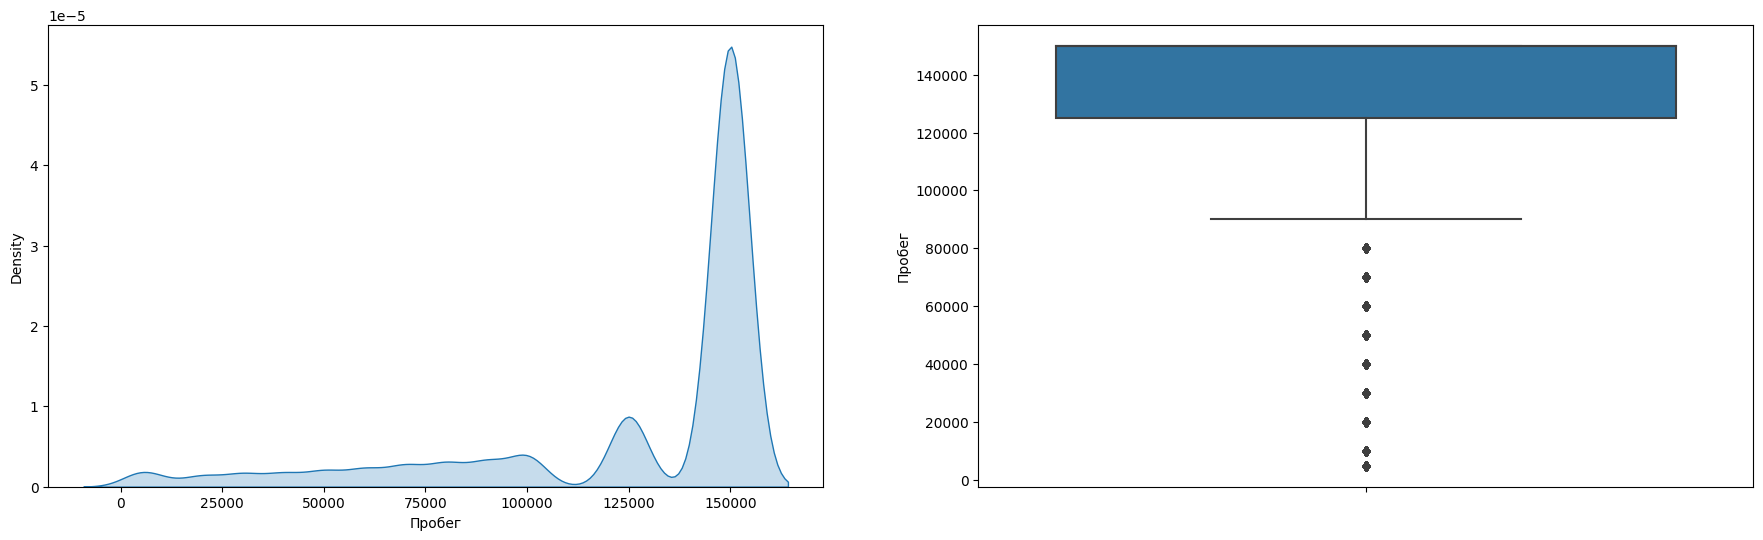

In [32]:
# Столбец пробег -равномерное распределение - ничегог не меняем
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Пробег"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Пробег"])

plt.show()

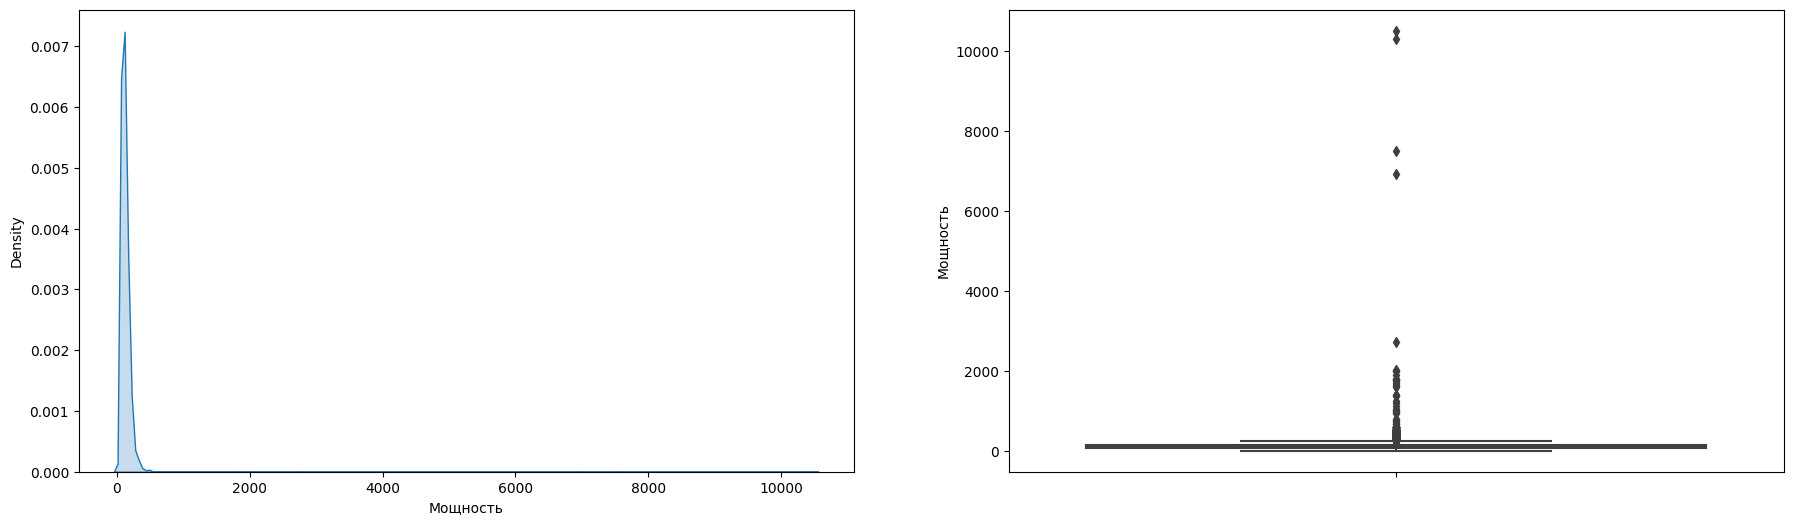

In [33]:
# С мощностью - есть выбросы
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Мощность"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Мощность"])

plt.show()

In [34]:
df[df["Мощность"]>1000]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Фотографии,Индекс,lastSeen
1898,1898,2016-03-22 20:52:00,Toyota_Corolla,Часное лицо,Angebot,3200.0,control,Малолитражка,2004.0,МКПП,...,Corolla,5000.0,6,Бензин,Toyota,Нет,2016-03-22 00:00:00,0.0,22043.0,2016-03-22 21:43:26
2199,2199,2016-03-21 11:55:22,Reparaturbeduerfdiger_Opel_Vectra_1.8,Часное лицо,Angebot,NaN,control,Седан,1999.0,None,...,Vectra,150000.0,1,Бензин,Opel,Да,2016-03-21 00:00:00,0.0,1723.0,2016-04-04 04:49:06
5582,5582,2016-03-29 19:44:48,verkauf__bastler__export,Часное лицо,Angebot,500.0,control,Универсал,1999.0,МКПП,...,Astra,150000.0,7,Бензин,Opel,Нет,2016-03-29 00:00:00,0.0,33154.0,2016-04-06 05:44:36
8038,8038,2016-04-02 19:25:25,VW_LUPO_1_4_16V_SCHWARZ_75PS_SPORTFAHRWERK_ABT...,Часное лицо,Angebot,1499.0,test,Малолитражка,1999.0,МКПП,...,Lupo,150000.0,4,Бензин,Volkswagen,Нет,2016-04-02 00:00:00,0.0,65830.0,2016-04-06 11:46:49
8099,8099,2016-04-02 11:48:54,Honda_Civic,Часное лицо,Angebot,1500.0,test,Малолитражка,2000.0,МКПП,...,Civic,150000.0,0,Бензин,Honda,Нет,2016-04-02 00:00:00,0.0,21509.0,2016-04-04 09:15:26
10148,10148,2016-03-14 20:06:19,Opel_zafira_2999в‚¬,Часное лицо,Angebot,2599.0,control,None,2016.0,МКПП,...,Zafira,150000.0,0,Бензин,Opel,Нет,2016-03-14 00:00:00,0.0,60326.0,2016-04-07 09:45:27
10368,10368,2016-03-31 20:51:13,Ford_Focus_Kombi_Schwarz_DEFEKT,Часное лицо,Angebot,550.0,test,Универсал,2003.0,МКПП,...,Focus,150000.0,1,Дизель,Ford,Да,2016-03-31 00:00:00,0.0,21039.0,2016-03-31 20:51:13
11577,11577,2016-03-25 19:55:32,Fiat_Lancia_Delta_HPE_1_6_16v,Часное лицо,Angebot,NaN,test,Седан,1998.0,МКПП,...,Другое,150000.0,8,Бензин,Fiat,Нет,2016-03-25 00:00:00,0.0,57520.0,2016-04-01 19:16:33
20008,20008,2016-03-20 11:00:08,Seat_ibiza_1.4_MPI,Часное лицо,Angebot,NaN,control,None,2016.0,МКПП,...,Ibiza,150000.0,0,None,Seat,Да,2016-03-20 00:00:00,0.0,42277.0,2016-03-20 11:00:08
20022,20022,2016-03-20 17:54:04,BMW_535_touring,Часное лицо,Angebot,9750.0,test,Универсал,2005.0,АКПП,...,5er,150000.0,7,Дизель,BMW,Нет,2016-03-20 00:00:00,0.0,21376.0,2016-03-23 02:48:53


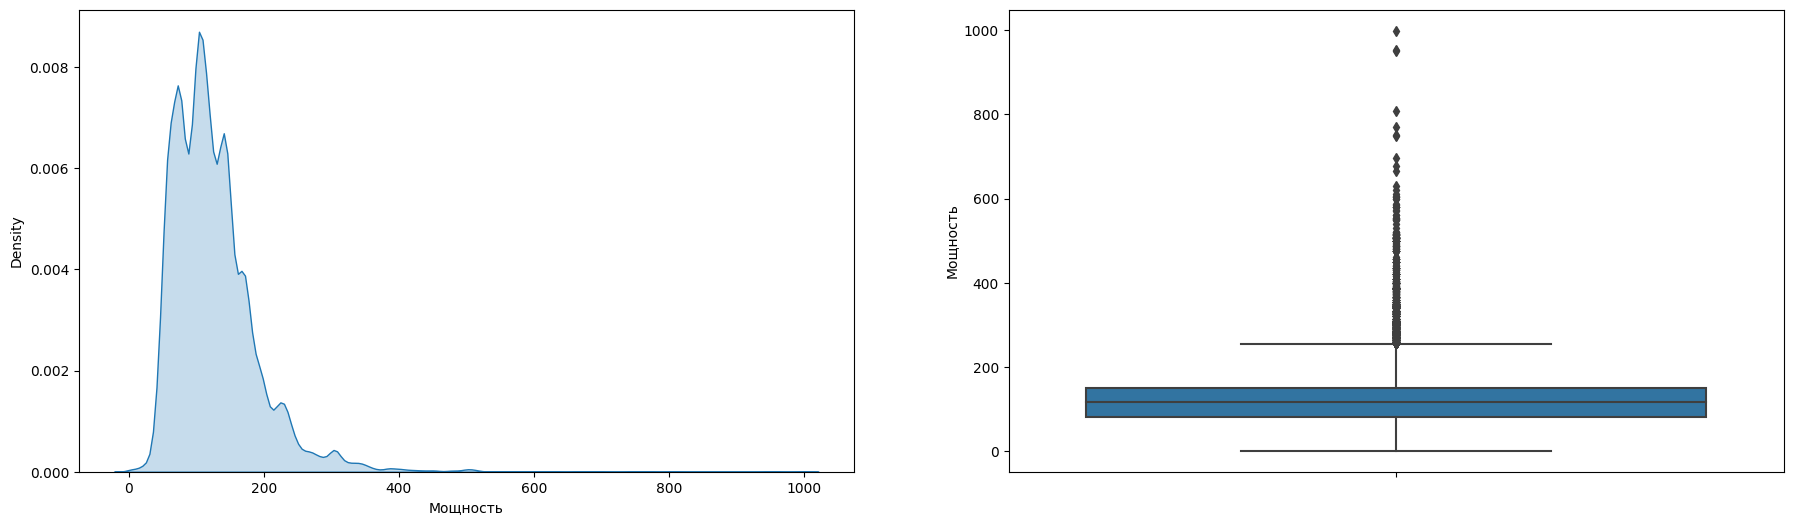

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df[df["Мощность"] <= 1000]["Мощность"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df[df["Мощность"] <= 1000]["Мощность"])

plt.show()

In [ ]:
#  Будем считать ошибкой такие мощности в интервалах
df.loc[(df["Мощность"]>1000)|(df["Мощность"]<30),"Мощность"]=None
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,NaN,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,NaN,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
# Заменяем отсутствующую мощность на медианную для модели
m_s=df.groupby(['Марка',"Модель"]).median()["Мощность"]
def m_fill(stroka):
  return m_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["Мощность"].isnull(),"Мощность"]=df[df["Мощность"].isnull()].apply(m_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,101.0,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,163.0,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
# Помогло не до полностью
df[df["Мощность"].isnull()]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
245740,245740,2016-03-30 11:39:08,Landrover__LARO,Часное лицо,Angebot,3800.0,test,Универсал,1978,МКПП,NaN,Series I,30000,0,Дизель,Land Rover,Нет,2016-03-30 00:00:00,49824,2016-03-30 11:39:08
293882,293882,2016-04-02 10:53:15,Land_Rover_Originalzustand,Часное лицо,Angebot,NaN,test,None,1970,None,NaN,Series I,100000,0,Бензин,Land Rover,Нет,2016-04-02 00:00:00,88634,2016-04-06 09:16:22


In [ ]:
# Причина
df[df["Модель"] == "Series I"]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
245740,245740,2016-03-30 11:39:08,Landrover__LARO,Часное лицо,Angebot,3800.0,test,Универсал,1978,МКПП,NaN,Series I,30000,0,Дизель,Land Rover,Нет,2016-03-30 00:00:00,49824,2016-03-30 11:39:08
293882,293882,2016-04-02 10:53:15,Land_Rover_Originalzustand,Часное лицо,Angebot,NaN,test,None,1970,None,NaN,Series I,100000,0,Бензин,Land Rover,Нет,2016-04-02 00:00:00,88634,2016-04-06 09:16:22


In [ ]:
#Заменяем отсутствующую мощность на медианную для марки
m_s=df.groupby('Марка').median()["Мощность"]
def m_fill(stroka):
  return m_s[stroka["Марка"]]
df.loc[df["Мощность"].isnull(),"Мощность"]=df[df["Мощность"].isnull()].apply(m_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,101.0,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190.0,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163.0,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75.0,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69.0,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,163.0,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101.0,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102.0,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100.0,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [ ]:
df[df["Модель"] == "Series I"]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
245740,245740,2016-03-30 11:39:08,Landrover__LARO,Часное лицо,Angebot,3800.0,test,Универсал,1978,МКПП,122.0,Series I,30000,0,Дизель,Land Rover,Нет,2016-03-30 00:00:00,49824,2016-03-30 11:39:08
293882,293882,2016-04-02 10:53:15,Land_Rover_Originalzustand,Часное лицо,Angebot,NaN,test,None,1970,None,122.0,Series I,100000,0,Бензин,Land Rover,Нет,2016-04-02 00:00:00,88634,2016-04-06 09:16:22


In [ ]:
df["Мощность"]=df["Мощность"].astype(int)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,101,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,163,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


5.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению

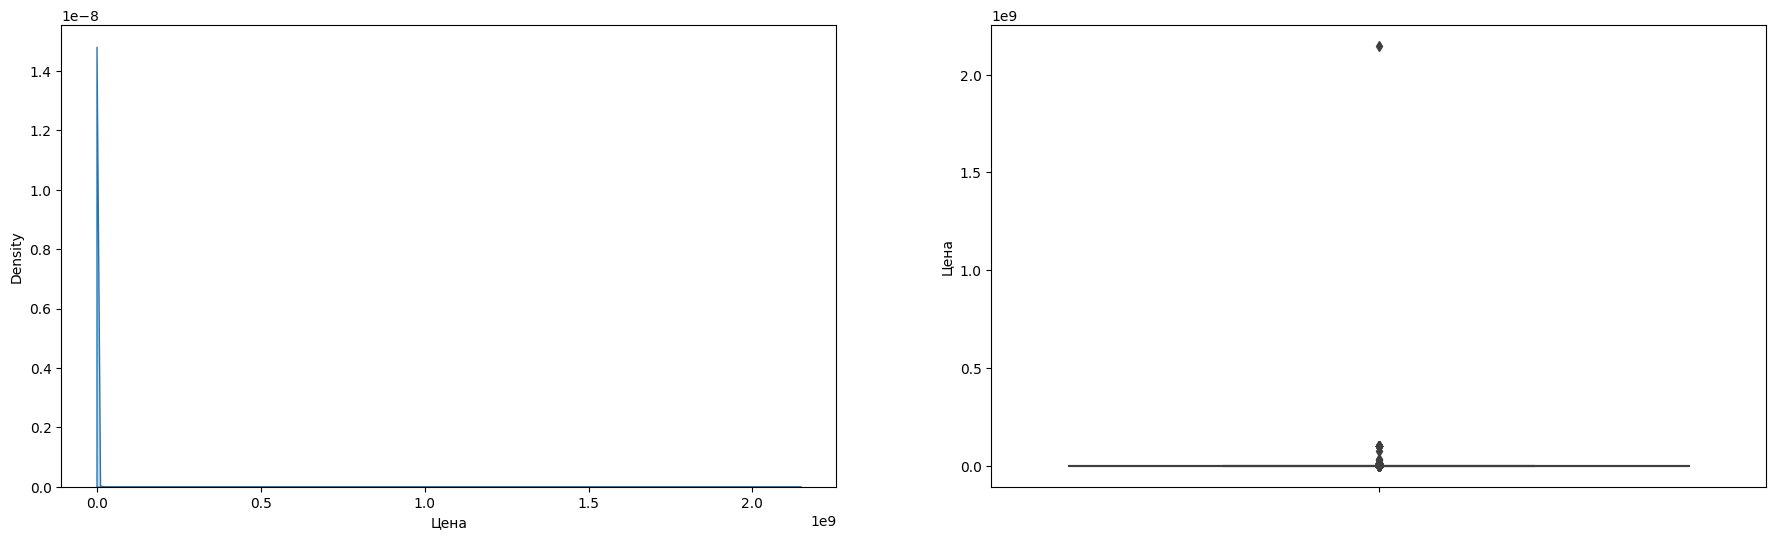

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Цена"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Цена"])

plt.show()

In [ ]:
df[df["Цена"]>1000000]

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
14663,14663,2016-04-03 06:03:56,Tausch_moeglich_Polo_vw_n9,Часное лицо,Angebot,11111111.0,control,Купе,2003,МКПП,64,Polo,150000,2,Бензин,Volkswagen,Нет,2016-04-03 00:00:00,46535,2016-04-07 10:16:51
20143,20143,2016-03-18 00:55:53,Porsche_911R_Einer_von_911,Часное лицо,Angebot,1250000.0,test,Купе,2016,МКПП,500,911,5000,3,Бензин,Porsche,Нет,2016-03-17 00:00:00,70435,2016-03-20 04:48:27
20746,20746,2016-03-08 15:54:52,Golf3_Schlachtfest,Часное лицо,Angebot,12345678.0,test,None,1995,None,101,Golf,150000,0,None,Volkswagen,Нет,2016-03-08 00:00:00,18516,2016-03-17 16:15:43
21467,21467,2016-03-19 19:45:02,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,Часное лицо,Angebot,9999999.0,control,Купе,1967,МКПП,215,911,50000,10,Бензин,Porsche,Нет,2016-03-19 00:00:00,70435,2016-04-01 10:45:30
39625,39625,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,Часное лицо,Angebot,12345678.0,control,None,2018,МКПП,95,V40,150000,6,None,Volvo,Нет,2016-03-08 00:00:00,14542,2016-04-06 23:17:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363434,363434,2016-03-23 06:36:20,Vw_Passat_35i_1.8_schlachtfest,Часное лицо,Angebot,10000000.0,test,Универсал,1996,МКПП,90,Golf,150000,0,Бензин,Volkswagen,Да,2016-03-23 00:00:00,36251,2016-03-26 01:16:15
364171,364171,2016-04-04 21:25:21,Ferrari_FXX,Часное лицо,Angebot,3890000.0,test,Купе,2006,None,799,Другое,5000,7,None,Sonstige Autos,Нет,2016-04-04 00:00:00,60313,2016-04-05 12:07:37
366653,366653,2016-03-20 10:59:52,BMW_E36_Cabrio_tausch_gegen_ein_Opel_Insignia,Часное лицо,Angebot,99999999.0,control,Кабриолет,1996,МКПП,192,3er,150000,0,None,BMW,Нет,2016-03-20 00:00:00,36251,2016-03-20 10:59:52
366861,366861,2016-03-21 10:53:06,Ferrari_FXX__unfallfrei__perfekter_Zustand,Часное лицо,Angebot,3895000.0,test,Купе,2006,None,799,Другое,5000,4,Бензин,Sonstige Autos,Нет,2016-03-21 00:00:00,60323,2016-03-22 10:36:39


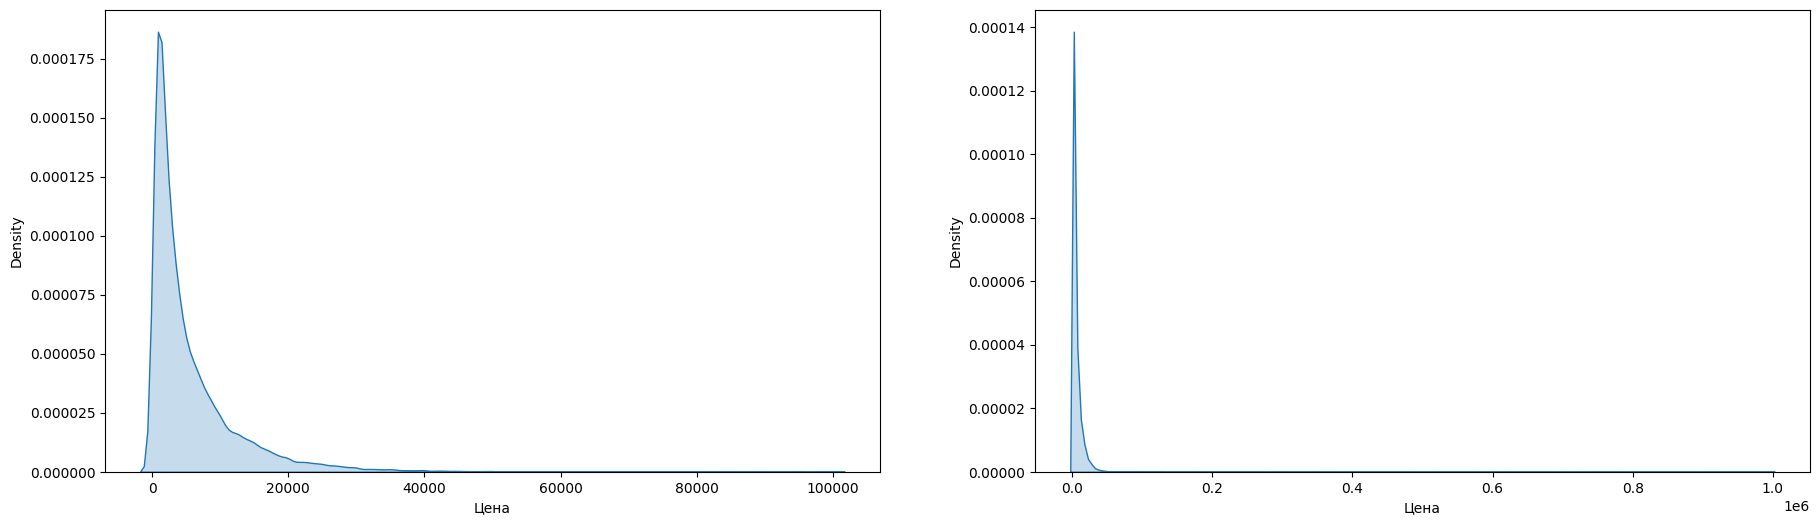

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df[df["Цена"]<=100000]["Цена"], shade=True)

plt.subplot(1,2,2)
ax = sns.kdeplot(df[df["Цена"]<=1000000]["Цена"], shade=True)

plt.show()

In [ ]:
df.loc[(df["Цена"]>60000)|(df["Цена"]<100),"Цена"]=None

In [ ]:
#Заменяем отсутствующую цену на среднюю для модели
ts_s=df.groupby(['Марка',"Модель"]).mean()["Цена"]
def ts_fill(stroka):
  return ts_s[stroka["Марка"]][stroka["Модель"]]
df.loc[df["Цена"].isnull(),"Цена"]=df[df["Цена"].isnull()].apply(ts_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,Мощность,Модель,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,101,Golf,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,190,A4,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,163,Grand Cherokee,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,75,Golf,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,69,Fabia,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,163,Другое,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,101,Fortwo,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,102,Transporter,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,100,Golf,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


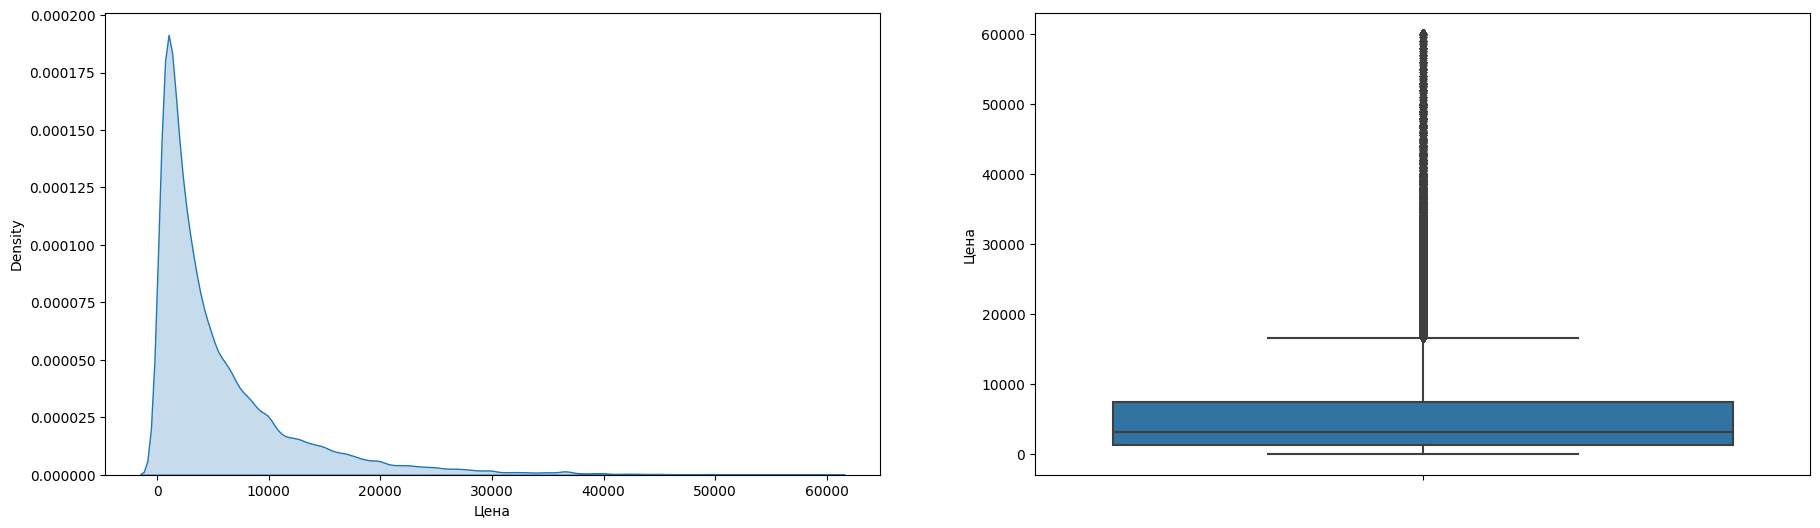

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df["Цена"], shade=True)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Цена"])

plt.show()

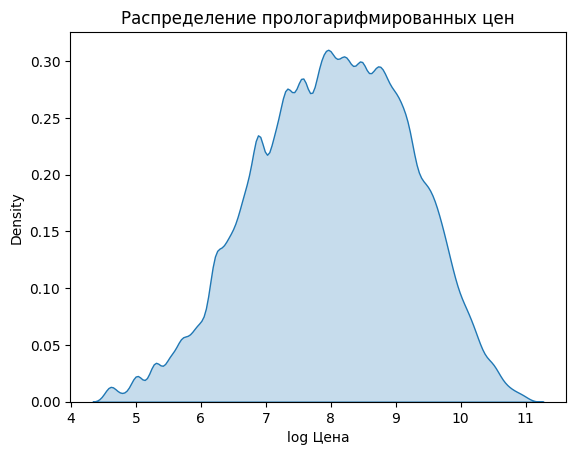

In [ ]:
df["log Цена"]=np.log(df.Цена)
sns.kdeplot(df["log Цена"], shade=True)
plt.title('Распределение прологарифмированных цен')
plt.show()

6.	Проведем анализ наиболее важных для  целевой функции price» параметров (powerPS, yearOfRegistration, kilometer и т.д). «Важность» определим при помощи коэффициента корреляции. Сделаем  визуализацию

Проверка корреляций является важной частью процесса анализа поисковых данных. Этот анализ является одним из методов, используемых для определения того, какие функции больше всего влияют на целевую переменную, и, в свою очередь, используются при прогнозировании этой целевой переменной, как правило, используются для визуализации корреляционных матриц. Простой способ построить тепловую карту в Python - это использовать библиотеку Seaborn.

1. Самый важный аргумент в функции - ввод данных, поскольку конечной целью является построение корреляции. Метод .corr() будет добавлен к данным в качестве первого аргумента.

sns.heatmap(df.corr().abs())

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<Axes: >

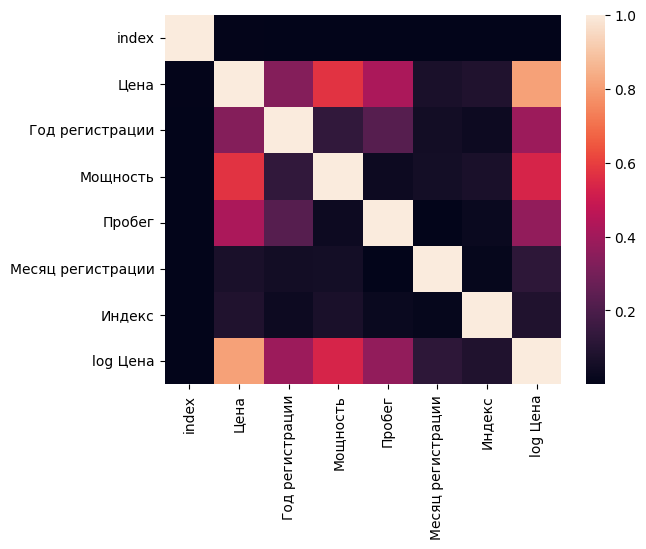

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

# Прежде чем построить корреляционную матрицу для всех столбцов, необходимо преобразовать текстовые данные в числовые.
В этом примере столбец КПП является полностью текстовым.  Поэтому, прежде чем мы сможем начать процесс аналтза, нужно преобразовать в  числовые данные с помощью класса LabelEncoder. Таким образом,  чтобы получить признак для столбца, нужно импортировать класс из библиотеки sklearn, обработать колонку функцией fit_transform и заменить существующие текстовые данные новыми закодированными.
Затем числовые признаки будут записаны в новый стодбец  К_КПП

In [ ]:
le_kpp=LabelEncoder()
le_kpp.fit(df.КПП)
df["К КПП"]=le_kpp.transform(df.КПП)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Пробег,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen,log Цена,К КПП
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,150000,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,125000,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,125000,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,150000,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,90000,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,20000,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,125000,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,150000,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,150000,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1


In [ ]:
le_kuz=LabelEncoder()
le_kuz.fit(df["Тип кузова"])
df["К Кузов"]=le_kuz.transform(df["Тип кузова"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Месяц регистрации,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen,log Цена,К КПП,К Кузов
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,0,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1,8
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,5,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1,3
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,8,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0,2
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,6,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1,4
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,7,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,1,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2,8
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,3,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0,1
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,3,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1,5
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,6,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1,7


In [ ]:
le_marka=LabelEncoder()
le_marka.fit(df["Марка"])
df["К Марка"]=le_marka.transform(df["Марка"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Тип двигателя,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen,log Цена,К КПП,К Кузов,К Марка
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,Бензин,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1,8,37
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,Дизель,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1,3,1
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,Дизель,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0,2,14
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,Бензин,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1,4,37
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,Дизель,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,None,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2,8,32
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,Бензин,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0,1,31
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,Дизель,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1,5,37
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,Дизель,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1,7,37


In [ ]:
le_model=LabelEncoder()
le_model.fit(df["Модель"])
df["К Модель"]=le_model.transform(df["Модель"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Марка,Требуется ремонт,Дата создания,Индекс,lastSeen,log Цена,К КПП,К Кузов,К Марка,К Модель
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,Volkswagen,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1,8,37,116
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,Audi,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1,3,1,30
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,Jeep,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0,2,14,117
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,Volkswagen,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1,4,37,116
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,Skoda,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1,4,30,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,Sonstige Autos,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2,8,32,249
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,Smart,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0,1,31,106
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,Volkswagen,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1,5,37,222
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,Volkswagen,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1,7,37,116


In [ ]:
le_type=LabelEncoder()
le_type.fit(df["Тип двигателя"])
df["К Тип двигателя"]=le_type.transform(df["Тип двигателя"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Требуется ремонт,Дата создания,Индекс,lastSeen,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,Нет,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1,8,37,116,0
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,Да,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1,3,1,30,4
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,Нет,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0,2,14,117,4
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,Нет,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1,4,37,116,0
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,Нет,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1,4,30,101,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,Нет,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2,8,32,249,7
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,Нет,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0,1,31,106,0
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,Нет,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1,5,37,222,4
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,Нет,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1,7,37,116,4


In [ ]:
le_remont=LabelEncoder()
le_remont.fit(df["Требуется ремонт"])
df["К Требуется ремонт"]=le_remont.transform(df["Требуется ремонт"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Дата создания,Индекс,lastSeen,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.173786,1,8,37,116,0,1
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.814656,1,3,1,30,4,0
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.190138,0,2,14,117,4,1
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.313220,1,4,37,116,0,1
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.188689,1,4,30,101,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.696213,2,8,32,249,7,1
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.089243,0,1,31,106,0,1
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.126959,1,5,37,222,4,1
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.131531,1,7,37,116,4,1


In [ ]:
df["Норм Пробег"]=(df["Пробег"]/5000).astype(int)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,Индекс,lastSeen,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,70435,2016-04-07 03:16:57,6.173786,1,8,37,116,0,1,30
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,66954,2016-04-07 01:46:50,9.814656,1,3,1,30,4,0,25
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,90480,2016-04-05 12:47:46,9.190138,0,2,14,117,4,1,25
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,91074,2016-03-17 17:40:17,7.313220,1,4,37,116,0,1,30
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,60437,2016-04-06 10:17:21,8.188689,1,4,30,101,4,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,39576,2016-04-06 00:46:52,7.696213,2,8,32,249,7,1,4
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,26135,2016-03-11 18:17:12,7.089243,0,1,31,106,0,1,25
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,87439,2016-04-07 07:15:26,9.126959,1,5,37,222,4,1,30
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,40764,2016-03-24 12:45:21,8.131531,1,7,37,116,4,1,30


In [ ]:
le_prod=LabelEncoder()
le_prod.fit(df["Продавец"])
df["К Продавец"]=le_prod.transform(df["Продавец"])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,lastSeen,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,2016-04-07 03:16:57,6.173786,1,8,37,116,0,1,30,1
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,2016-04-07 01:46:50,9.814656,1,3,1,30,4,0,25,1
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,2016-04-05 12:47:46,9.190138,0,2,14,117,4,1,25,1
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,2016-03-17 17:40:17,7.313220,1,4,37,116,0,1,30,1
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,2016-04-06 10:17:21,8.188689,1,4,30,101,4,1,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,2016-04-06 00:46:52,7.696213,2,8,32,249,7,1,4,1
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,2016-03-11 18:17:12,7.089243,0,1,31,106,0,1,25,1
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,2016-04-07 07:15:26,9.126959,1,5,37,222,4,1,30,1
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,2016-03-24 12:45:21,8.131531,1,7,37,116,4,1,30,1


In [ ]:
df["Норм Год регистрации"] = df["Год регистрации"]-df["Год регистрации"].min()
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,6.173786,1,8,37,116,0,1,30,1,53
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,9.814656,1,3,1,30,4,0,25,1,71
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,9.190138,0,2,14,117,4,1,25,1,64
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,7.313220,1,4,37,116,0,1,30,1,61
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,8.188689,1,4,30,101,4,1,18,1,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,7.696213,2,8,32,249,7,1,4,1,65
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,7.089243,0,1,31,106,0,1,25,1,60
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,9.126959,1,5,37,222,4,1,30,1,56
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,8.131531,1,7,37,116,4,1,30,1,62


После преобразования текстовых столбцов, можно построить мвтрицу корреляции для новых столбцов признаков.

<Axes: >

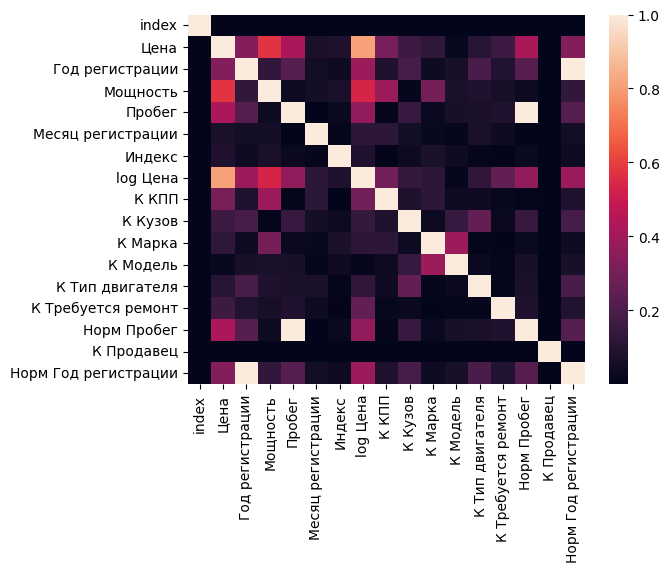

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

<Axes: >

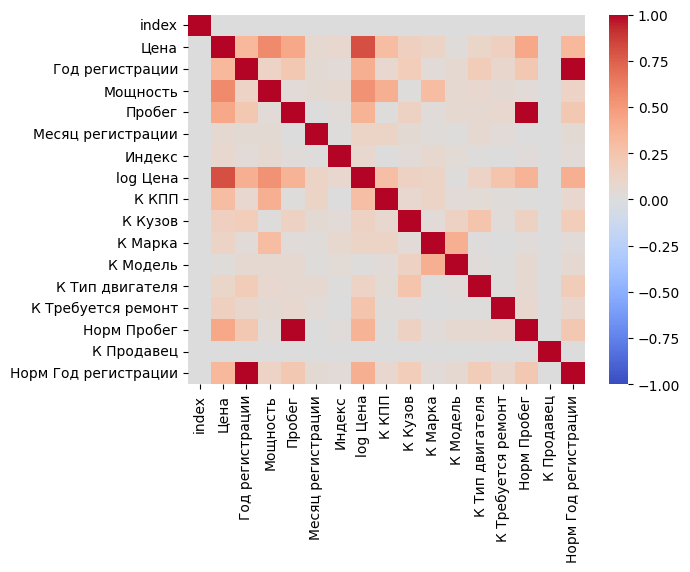

In [ ]:
sns.heatmap(df.corr().abs(),
            xticklabels=df.corr().abs().columns,
            yticklabels=df.corr().abs().columns,  vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

7.	Постройте диаграммы рассеяния зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

Диаграммы рассеяния используются для наблюдения за взаимосвязями между переменными, а для обозначения взаимосвязи между ними используются точки. Метод scatter() в библиотеке matplotlib используется для построения диаграммы рассеяния. Диаграммы рассеяния широко используются для представления связи между переменными и того, как изменение одной влияет на другую.
Синтаксис
Синтаксис метода scatter() приведен ниже:


matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, маркер=None, cmap=None, vmin=None, vmax=None, Alpha=None, linewidths=None, Edgecolors=None)

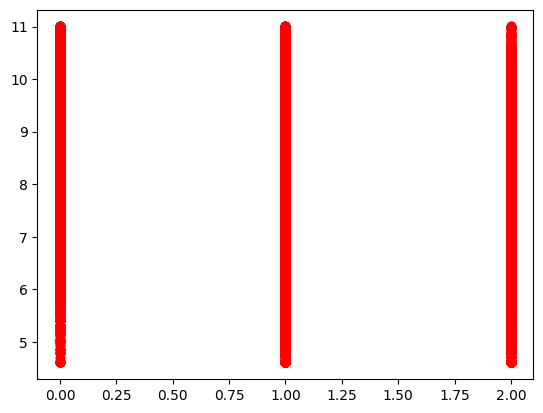

In [ ]:
plt.scatter(
        x=[price for price in df["К КПП"]],
        y=np.log(df["Цена"]),
        color = 'red'
    )

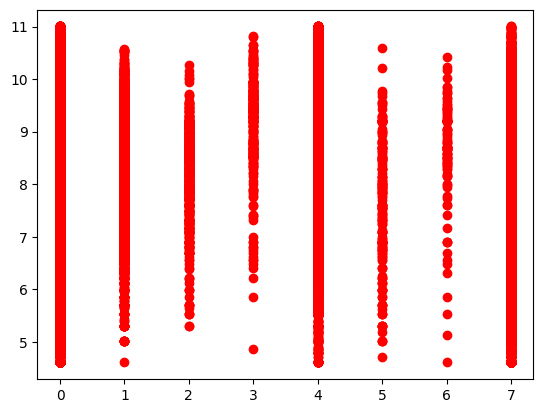

In [ ]:
plt.scatter(
        x=[price for price in df["К Тип двигателя"]],
        y=np.log(df["Цена"]),
        color = 'red'
    )

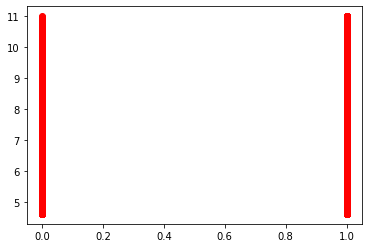

In [ ]:
plt.scatter(
        x=[price for price in df["К Требуется ремонт"]],
        y=np.log(df["Цена"]),
        color = 'red'
    )

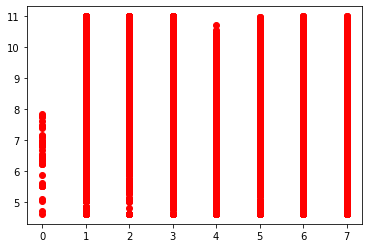

In [ ]:
plt.scatter(
        x=[price for price in df["К Кузов"]],
        y=np.log(df["Цена"]),
        color = 'red'
    )

8.	Реализуйте минимум 3 алгоритма по работе с категориальными данными

In [ ]:
#Первый уже показан выше
#Второй - соответствие категории
df["К21 КПП"]=(df["КПП"]=="МКПП")*1
df["К22 КПП"]=(df["КПП"]=="АКПП")*1
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации,К21 КПП,К22 КПП
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,8,37,116,0,1,30,1,53,1,0
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,3,1,30,4,0,25,1,71,1,0
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,2,14,117,4,1,25,1,64,0,1
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,4,37,116,0,1,30,1,61,1,0
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,4,30,101,4,1,18,1,68,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,8,32,249,7,1,4,1,65,0,0
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,1,31,106,0,1,25,1,60,0,1
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,5,37,222,4,1,30,1,56,1,0
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,7,37,116,4,1,30,1,62,1,0


In [ ]:
#Третий - замена на среднее значение. Заменим марку и модель на их среднюю цену
ts_s=df.groupby(['Марка',"Модель"]).mean()["Цена"]
def ts_fill(stroka):
  return ts_s[stroka["Марка"]][stroka["Модель"]]
df["К3 Цена"]=df.apply(ts_fill, axis=1)
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации,К21 КПП,К22 КПП,К3 Цена
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,37,116,0,1,30,1,53,1,0,4713.252939
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,1,30,4,0,25,1,71,1,0,6532.022180
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,14,117,4,1,25,1,64,0,1,10005.239203
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,37,116,0,1,30,1,61,1,0,4713.252939
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,30,101,4,1,18,1,68,1,0,4226.562409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,32,249,7,1,4,1,65,0,0,9901.493299
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,31,106,0,1,25,1,60,0,1,3568.518592
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,37,222,4,1,30,1,56,1,0,10087.398801
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,37,116,4,1,30,1,62,1,0,4713.252939


<Axes: >

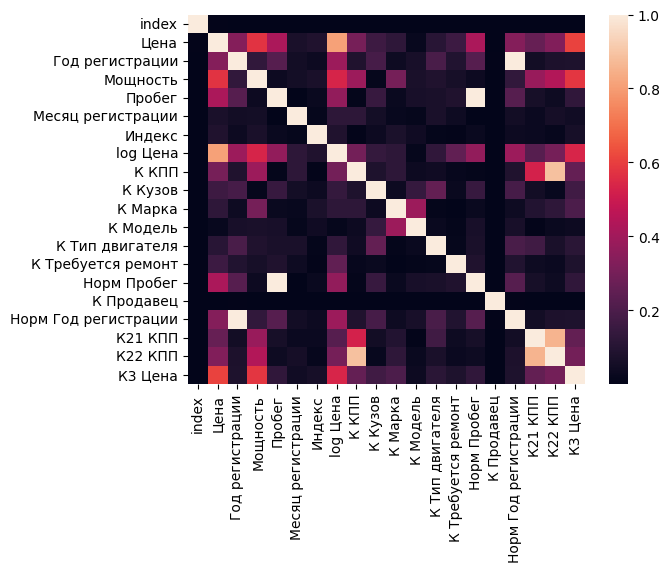

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

9.	Сделайте нормализацию (стандартизацию) датасета

In [ ]:
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации,К21 КПП,К22 КПП,К3 Цена
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,37,116,0,1,30,1,53,1,0,4713.252939
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,1,30,4,0,25,1,71,1,0,6532.022180
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,14,117,4,1,25,1,64,0,1,10005.239203
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,37,116,0,1,30,1,61,1,0,4713.252939
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,30,101,4,1,18,1,68,1,0,4226.562409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,32,249,7,1,4,1,65,0,0,9901.493299
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,31,106,0,1,25,1,60,0,1,3568.518592
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,37,222,4,1,30,1,56,1,0,10087.398801
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,37,116,4,1,30,1,62,1,0,4713.252939


In [ ]:
df.describe()

,index,Цена,Год регистрации,Мощность,Пробег,Месяц регистрации,Индекс,log Цена,К КПП,К Кузов,К Марка,К Модель,К Тип двигателя,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации,К21 КПП,К22 КПП,К3 Цена
count,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000,371528.000000
mean,185763.500000,5712.569692,2003.387239,124.484313,125618.688228,5.734445,50820.66764,8.022733,0.846859,5.199387,20.370492,115.510303,1.813333,0.902333,25.123738,0.999992,63.387239,0.738071,0.207535,5712.569692
std,107251.039743,6934.623743,7.545341,61.158528,40112.337051,3.712412,25799.08247,1.187048,0.488342,1.962526,13.000691,78.934785,2.409689,0.296864,8.022467,0.002842,7.545341,0.439685,0.405542,4224.194416
min,0.000000,100.000000,1940.000000,30.000000,5000.000000,0.000000,1067.00000,4.605170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,566.900000
25%,92881.750000,1300.000000,1999.000000,80.000000,125000.000000,3.000000,30459.00000,7.170120,1.000000,4.000000,9.000000,42.000000,0.000000,1.000000,25.000000,1.000000,59.000000,0.000000,0.000000,2887.854223
50%,185763.500000,3200.000000,2003.000000,115.000000,150000.000000,6.000000,49610.00000,8.070906,1.000000,6.000000,23.000000,116.000000,0.000000,1.000000,30.000000,1.000000,63.000000,1.000000,0.000000,4713.252939
75%,278645.250000,7450.000000,2008.000000,150.000000,150000.000000,9.000000,71546.00000,8.915969,1.000000,7.000000,32.000000,171.000000,4.000000,1.000000,30.000000,1.000000,68.000000,1.000000,0.000000,7376.611111
max,371527.000000,60000.000000,2019.000000,1000.000000,150000.000000,12.000000,99998.00000,11.002100,2.000000,8.000000,38.000000,249.000000,7.000000,1.000000,30.000000,1.000000,79.000000,1.000000,1.000000,47950.000000


*StandardScaler().fit(df[["Норм Год регистрации"]])*
В машинном обучении StandardScaler  используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

StandardScaler – это важный метод, который в основном выполняется как этап предварительной обработки перед многими моделями машинного обучения, чтобы стандартизировать диапазон функциональных возможностей входного набора данных.
Модуль preprocessing предоставляет StandardScalerслужебный класс, который представляет собой быстрый и простой способ выполнить следующую операцию с набором данных, подобным массиву:

>>> from sklearn import preprocessing

In [ ]:
std_god=StandardScaler().fit(df[["Норм Год регистрации"]])
std_mosh=StandardScaler().fit(df[["Мощность"]])
std_probeg=StandardScaler().fit(df[["Норм Пробег"]])
#df[["Стд Мощность","Стд Пробег","Стд Год"]] = StandardScaler().fit_transform(df[['Мощность', 'Норм Пробег',"Норм Год регистрации"]])
df["Стд Мощность"]=std_mosh.transform(df[["Мощность"]])
df["Стд Год регистрации"]=std_god.transform(df[["Норм Год регистрации"]])
df["Стд Пробег"]=std_probeg.transform(df[["Норм Пробег"]])
df

,index,Получено,Наименование,Продавец,Тип запроса,Цена,Тестирование,Тип кузова,Год регистрации,КПП,...,К Требуется ремонт,Норм Пробег,К Продавец,Норм Год регистрации,К21 КПП,К22 КПП,К3 Цена,Стд Мощность,Стд Год регистрации,Стд Пробег
0,0,2016-03-24 11:52:17,Golf_3_1.6,Часное лицо,Angebot,480.0,test,None,1993,МКПП,...,1,30,1,53,1,0,4713.252939,-0.383991,-1.376645,0.607827
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Часное лицо,Angebot,18300.0,test,Купе,2011,МКПП,...,0,25,1,71,1,0,6532.022180,1.071245,1.008937,-0.015424
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Часное лицо,Angebot,9800.0,test,Кроссовер,2004,АКПП,...,1,25,1,64,0,1,10005.239203,0.629769,0.081211,-0.015424
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TГњRER,Часное лицо,Angebot,1500.0,test,Малолитражка,2001,МКПП,...,1,30,1,61,1,0,4713.252939,-0.809117,-0.316386,0.607827
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Часное лицо,Angebot,3600.0,test,Малолитражка,2008,МКПП,...,1,18,1,68,1,0,4226.562409,-0.907222,0.611340,-0.887975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Часное лицо,Angebot,2200.0,test,None,2005,None,...,1,4,1,65,0,0,9901.493299,0.629769,0.213743,-2.633076
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Часное лицо,Angebot,1199.0,test,Кабриолет,2000,АКПП,...,1,25,1,60,0,1,3568.518592,-0.383991,-0.448919,-0.015424
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Часное лицо,Angebot,9200.0,test,Минивен,1996,МКПП,...,1,30,1,56,1,0,10087.398801,-0.367640,-0.979048,0.607827
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Часное лицо,Angebot,3400.0,test,Универсал,2002,МКПП,...,1,30,1,62,1,0,4713.252939,-0.400342,-0.183854,0.607827


<Axes: >

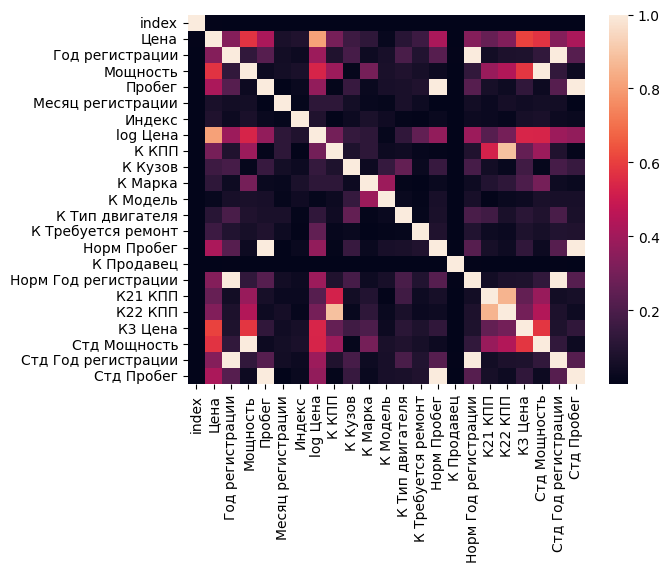

In [ ]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

10.	Сохраните полученный датасет и выведете его

In [ ]:
df.index.name = 'id'

In [ ]:
df.to_csv("/drive/MyDrive/Colab Notebooks/cars2.csv")

In [ ]:
dump([std_god,std_mosh,std_probeg,le_kpp,le_kuz,le_marka,le_model,le_type,le_remont,le_prod], '/drive/MyDrive/Colab Notebooks/cars.bin', compress=True)

['/drive/MyDrive/Colab Notebooks/cars.bin']

Задание 1
Загрузить датасет Coffee_Chain_Sales

Задание 2
Вывести информацию о датасете

Задание 3
Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д. Переведите в числовой тип.

Задание 4
Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения (категориальные на моду, числовые на среднее). Постарайтесь данное преобразование выполнить в одном цикле.

Задание 5
Постройте гистограммы распределения числовых присзнаков и боксплоты.

Задание 6
Постройте корреляционную матрицу для целевого признака, предварительно обработайте признаки (переведите в категориальный тип)

Задание 7
Постройте диаграммы рассеяния  для оценки взаимосвязи между переменными

Задание 8
Сделайте нормализацию датасета. Сохраните итоговый датасет.